In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
%matplotlib inline

lancaster=LancasterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\olive\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
sentences = []
with open(r"./AllsWellThatEndsWell.txt", 'r') as f:
    for line in f.read().split('\n'):
        if line.upper() != line:
            sentences.append(line)
shks_index = len(sentences)
print("Shakespear Index: {} to {}".format(0, shks_index))
with open(r"./lyric_data.txt", 'r', encoding='utf-8') as f:
    for line in f.read().split('\n'):
        if len(line)==0:
            continue
        if line[0] != '[':
            sentences.append(line)
print("Migos Index: {} to {}".format(shks_index, len(sentences)))

Shakespear Index: 0 to 3329
Migos Index: 3329 to 24993


In [3]:
def diedge_exists(a, b):
    # direction matters!
    try:
        return b in SEN.neighbors(a)
    except nx.NetworkXError:
        return False

In delivering my son from me I bury a second husband
('del', 'son', 1.0)
('del', 'bury', 0.5)
('del', 'second', 0.3333333333333333)
('del', 'husband', 0.25)
('son', 'bury', 1.0)
('son', 'second', 0.5)
('son', 'husband', 0.3333333333333333)
('bury', 'second', 1.0)
('bury', 'husband', 0.5)
('second', 'husband', 1.0)


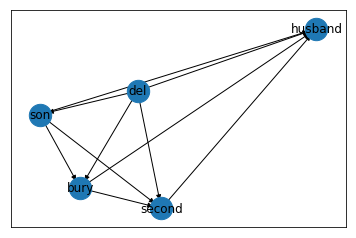

In [4]:
sentence = sentences[2]
sentence = sentence.translate(str.maketrans('', '', string.punctuation))
words = sentence.lower().split()
words = list(filter(lambda word: word not in stopwords.words('english'), words))
words = [lancaster.stem(word) for word in words]
SEN = nx.DiGraph()
for i in range(len(words)-1):
    for j in range(i+1, len(words)):
        if diedge_exists(words[i], words[j]):
            SEN[words[i]][words[j]]['weight'] = SEN[words[i]][words[j]]['weight'] + 1/(j-i)
        else:
            SEN.add_edge(words[i], words[j], weight=1/(j-i))
pos = nx.spring_layout(SEN)
nx.draw_networkx_nodes(SEN, pos, cmap=plt.get_cmap('jet'), node_size = 500)
nx.draw_networkx_labels(SEN, pos)
nx.draw_networkx_edges(SEN, pos, edgelist=SEN.edges(), arrows=True)
print(sentence)
for edge in SEN.edges.data('weight', default=1):
    print(edge)
plt.show()

Where the work and fuckin drugs at where its at
('work', 'fuckin', 1.0)
('work', 'drug', 0.5)
('fuckin', 'drug', 1.0)


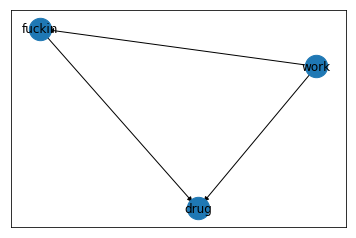

In [5]:
sentence = sentences[-2]
sentence = sentence.translate(str.maketrans('', '', string.punctuation))
words = sentence.lower().split()
words = list(filter(lambda word: word not in stopwords.words('english'), words))
words = [lancaster.stem(word) for word in words]
SEN = nx.DiGraph()
for i in range(len(words)-1):
    for j in range(i+1, len(words)):
        if diedge_exists(words[i], words[j]):
            SEN[words[i]][words[j]]['weight'] = SEN[words[i]][words[j]]['weight'] + 1/(j-i)
        else:
            SEN.add_edge(words[i], words[j], weight=1/(j-i))
pos = nx.spring_layout(SEN)
nx.draw_networkx_nodes(SEN, pos, cmap=plt.get_cmap('jet'), node_size = 500)
nx.draw_networkx_labels(SEN, pos)
nx.draw_networkx_edges(SEN, pos, edgelist=SEN.edges(), arrows=True)
print(sentence)
for edge in SEN.edges.data('weight', default=1):
    print(edge)
plt.show()

In [6]:
data = []
for sentence in sentences:
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))
    words = sentence.lower().split()
    words = list(filter(lambda word: word not in stopwords.words('english'), words))
    words = [lancaster.stem(word) for word in words]
    SEN = nx.DiGraph()
    for i in range(len(words)-1):
        for j in range(i+1, len(words)):
            # Only track 1 basewords ahead
            if j > i + 1:
                break
            if diedge_exists(words[i], words[j]):
                SEN[words[i]][words[j]]['weight'] = SEN[words[i]][words[j]]['weight'] + 1/(j-i)
            else:
                SEN.add_edge(words[i], words[j], weight=1/(j-i))
    sen_dic = {}
    for edge in SEN.edges.data('weight', default=1):
        sen_dic['_'.join([edge[0], edge[1]])] = edge[2]
    data.append(sen_dic)

In [7]:
df = pd.DataFrame(data).fillna(0)
del data

In [8]:
df.head()

,000_aint,000_chain,000_chop,000_crap,000_doll,000_fac,000_rol,007_jam,0100_lamb,07_almost,...,‘round_mand,‘tato_k,“buddy_buddy”,“come_things”,“damn_boy”,“fuck_it”,“plain_jane”,“put_shit,“yadda_mean”,⟔so_many
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
for col in df.columns.tolist():
    if df[col].sum() < 1:
        df = df.drop([col], axis=1)

In [10]:
df['Corpus'] = "Migos"
df.loc[:shks_index, 'Corpus'] = "Shakespeare"
df.head()

,000_aint,000_chain,000_chop,000_crap,000_doll,000_fac,000_rol,007_jam,0100_lamb,07_almost,...,‘tato_k,“buddy_buddy”,“come_things”,“damn_boy”,“fuck_it”,“plain_jane”,“put_shit,“yadda_mean”,⟔so_many,Corpus
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Shakespeare
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Shakespeare
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Shakespeare
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Shakespeare
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Shakespeare


In [12]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
pca = TruncatedSVD(n_components=3)
pca.fit(df.drop(['Corpus'], axis=1))
Z = pca.transform(df.drop(['Corpus'], axis=1))

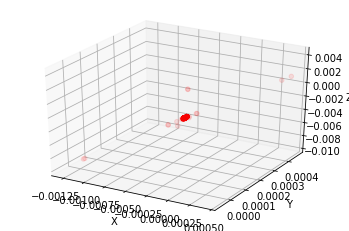

In [13]:
from mpl_toolkits.mplot3d import axes3d, Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

m = 'o'
xs = Z[:shks_index, 0]
ys = Z[:shks_index, 1]
zs = Z[:shks_index, 2]
ax.scatter(xs, ys, zs, marker=m, color='r', alpha=0.1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

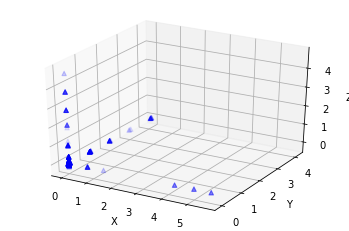

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

m = '^'
xs = Z[shks_index:, 0]
ys = Z[shks_index:, 1]
zs = Z[shks_index:, 2]
ax.scatter(xs, ys, zs, marker=m, color='b', alpha=0.1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()